In [1]:
from data_processing import read_data, split_data, visualize_data
from classification_models import Classifier

import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

## Dataset:
Function ***read_data*** is used to read the data from the file located at the path provided. Here, I have used the ***vehicles.csv*** dataset.

In [3]:
X, y, class_map, _, _ = read_data('../../datasets/vehicles.csv')

,Mapping
0,bus
1,opel
2,saab
3,van


## Visualizing the Data:
The data is visualized using ***PCA*** (or ***LDA*** if required,) using the ***visualize_data*** function. Here we also Scree plot with the first 8 principal components in consideration.

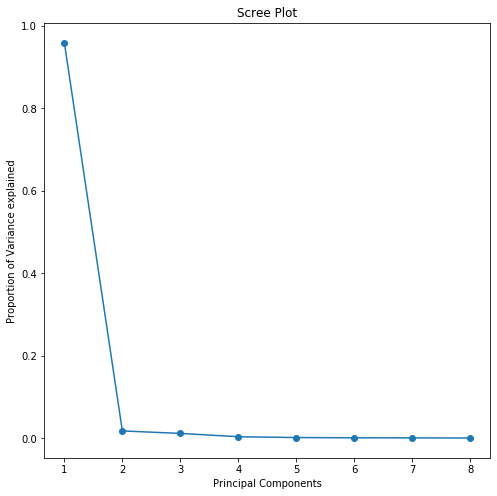

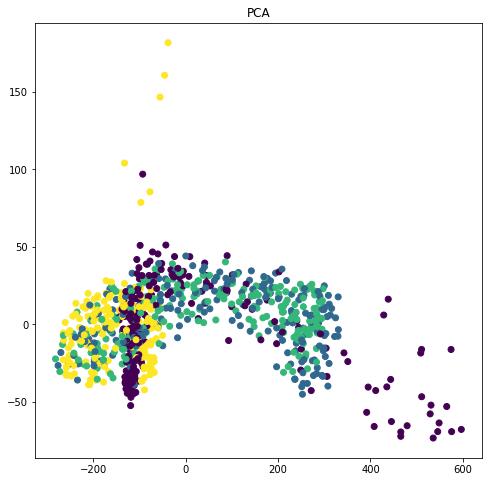

In [4]:
status = visualize_data('PCA', X, y, 8)

## Data Split:
The dataset is split into ***training*** and ***testing*** datasets, where ***75%*** of the dataset is training data and ***25%*** is test data. This split was selected after testing the evaluation metrics against other splits. This was found to be the best.

In [5]:
X_train, X_test, y_train, y_test = split_data(X, y)

## Multi Layer Perceptron:
### Model Details:
For the purpose of classifying the dataset, I have trained the ***MLP Classifier***, which has an architecture of 3 hidden layers of sizes 300, 200 and 150 respectively. The classifier uses ***ReLu*** activation function.

### Evaluation:
As part of the evaluation segment of this task, I have used shown multiple metrics for the classifier. These include metrics such as (but not limited to):
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

,f1-score,precision,recall,support
0,0.953271,0.910714,1.000000,51.000000
1,0.654545,0.666667,0.642857,56.000000
2,0.655462,0.639344,0.672414,58.000000
3,0.909091,0.975610,0.851064,47.000000
accuracy,0.783019,0.783019,0.783019,0.783019
macro avg,0.793092,0.798084,0.791584,212.000000
weighted avg,0.783092,0.786393,0.783019,212.000000


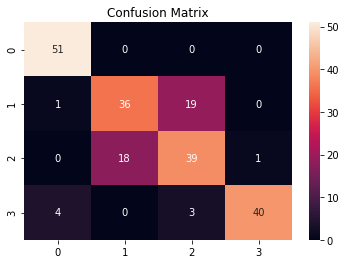

In [6]:
mlp_model = Classifier(model='mlp', hidden_size = (300, 200, 150))
mlp_model.train(X_train, y_train)
mlp_model.validate(X_test, y_test)
mlp_report = mlp_model.show_report()
mlp_confusion = mlp_model.confusion_matrix()

## Logistic Regression:
### Model Details:
I have also trained ***Logistic Regression Classifier***, that uses the ***newton-cg*** solver.

### Evaluation:
As part of the evaluation segment of this task, I have used shown multiple metrics for the classifier. These include metrics such as (but not limited to):
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

,f1-score,precision,recall,support
0,0.960784,0.960784,0.960784,51.000000
1,0.660377,0.700000,0.625000,56.000000
2,0.689076,0.672131,0.706897,58.000000
3,0.969072,0.940000,1.000000,47.000000
accuracy,0.811321,0.811321,0.811321,0.811321
macro avg,0.819827,0.818229,0.823170,212.000000
weighted avg,0.808934,0.808319,0.811321,212.000000


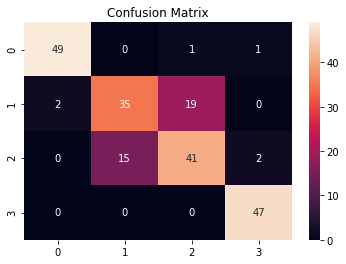

In [7]:
logistic_model = Classifier(model='logistic', solver='newton-cg', multi_class='multinomial')
logistic_model.train(X_train, y_train)
logistic_model.validate(X_test, y_test) 
logistic_report = logistic_model.show_report()
logistic_confusion = logistic_model.confusion_matrix()